## Calculating the chi-square for a distribution and a histogram.

We will do it two ways. With and without normalized histograms

In [7]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


### make some data from a N(0,1) distribution

In [8]:
n_bins = 50
x = norm.rvs(size=10000)

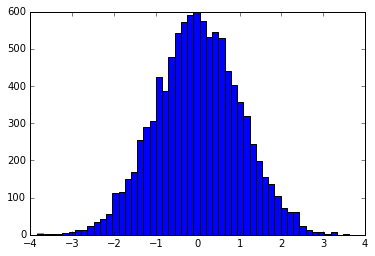

In [9]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)

## Get Bin centers

Get the location for the bin centers. Here I do it step by step so you can see what is going on.

In [10]:
# all bins edges
bins

array([-3.8305699 , -3.68149864, -3.53242739, -3.38335613, -3.23428487,
       -3.08521362, -2.93614236, -2.7870711 , -2.63799985, -2.48892859,
       -2.33985733, -2.19078608, -2.04171482, -1.89264356, -1.74357231,
       -1.59450105, -1.44542979, -1.29635854, -1.14728728, -0.99821602,
       -0.84914477, -0.70007351, -0.55100225, -0.401931  , -0.25285974,
       -0.10378848,  0.04528277,  0.19435403,  0.34342529,  0.49249654,
        0.6415678 ,  0.79063906,  0.93971031,  1.08878157,  1.23785283,
        1.38692408,  1.53599534,  1.6850666 ,  1.83413785,  1.98320911,
        2.13228037,  2.28135162,  2.43042288,  2.57949413,  2.72856539,
        2.87763665,  3.0267079 ,  3.17577916,  3.32485042,  3.47392167,
        3.62299293])

In [11]:
right_edges = bins[1:]
right_edges

array([-3.68149864, -3.53242739, -3.38335613, -3.23428487, -3.08521362,
       -2.93614236, -2.7870711 , -2.63799985, -2.48892859, -2.33985733,
       -2.19078608, -2.04171482, -1.89264356, -1.74357231, -1.59450105,
       -1.44542979, -1.29635854, -1.14728728, -0.99821602, -0.84914477,
       -0.70007351, -0.55100225, -0.401931  , -0.25285974, -0.10378848,
        0.04528277,  0.19435403,  0.34342529,  0.49249654,  0.6415678 ,
        0.79063906,  0.93971031,  1.08878157,  1.23785283,  1.38692408,
        1.53599534,  1.6850666 ,  1.83413785,  1.98320911,  2.13228037,
        2.28135162,  2.43042288,  2.57949413,  2.72856539,  2.87763665,
        3.0267079 ,  3.17577916,  3.32485042,  3.47392167,  3.62299293])

In [12]:
left_edges = bins[:-1]
left_edges

array([-3.8305699 , -3.68149864, -3.53242739, -3.38335613, -3.23428487,
       -3.08521362, -2.93614236, -2.7870711 , -2.63799985, -2.48892859,
       -2.33985733, -2.19078608, -2.04171482, -1.89264356, -1.74357231,
       -1.59450105, -1.44542979, -1.29635854, -1.14728728, -0.99821602,
       -0.84914477, -0.70007351, -0.55100225, -0.401931  , -0.25285974,
       -0.10378848,  0.04528277,  0.19435403,  0.34342529,  0.49249654,
        0.6415678 ,  0.79063906,  0.93971031,  1.08878157,  1.23785283,
        1.38692408,  1.53599534,  1.6850666 ,  1.83413785,  1.98320911,
        2.13228037,  2.28135162,  2.43042288,  2.57949413,  2.72856539,
        2.87763665,  3.0267079 ,  3.17577916,  3.32485042,  3.47392167])

In [13]:
bin_centers = (right_edges+left_edges)/2
bin_centers

array([-3.75603427, -3.60696301, -3.45789176, -3.3088205 , -3.15974924,
       -3.01067799, -2.86160673, -2.71253547, -2.56346422, -2.41439296,
       -2.2653217 , -2.11625045, -1.96717919, -1.81810793, -1.66903668,
       -1.51996542, -1.37089417, -1.22182291, -1.07275165, -0.9236804 ,
       -0.77460914, -0.62553788, -0.47646663, -0.32739537, -0.17832411,
       -0.02925286,  0.1198184 ,  0.26888966,  0.41796091,  0.56703217,
        0.71610343,  0.86517468,  1.01424594,  1.1633172 ,  1.31238845,
        1.46145971,  1.61053097,  1.75960222,  1.90867348,  2.05774474,
        2.20681599,  2.35588725,  2.50495851,  2.65402976,  2.80310102,
        2.95217228,  3.10124353,  3.25031479,  3.39938605,  3.5484573 ])

In [14]:
bin_width = bins[1]-bins[0]

## Raw histogram counts

To go from the pdf to the expected counts in a bin, you need to include a normalization constant.

In [15]:
normalization = x.size*(bins[1]-bins[0])

In [16]:
prediction = normalization*norm.pdf(bin_centers)

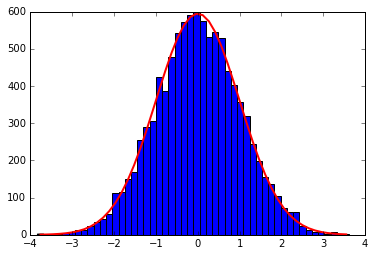

In [17]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)
plt.plot(bin_centers,prediction, c='r', lw=2)

In [18]:
np.sum(prediction), np.sum(counts)

(9997.9326102629075, 10000.0)

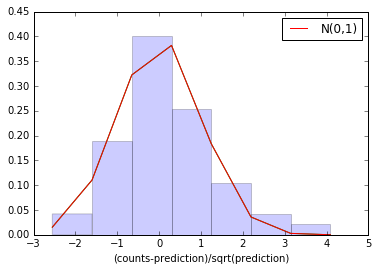

In [19]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts-prediction)/np.sqrt(prediction), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]))
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1)')
plt.legend()
plt.xlabel('(counts-prediction)/sqrt(prediction)')

## Chisquare

In [20]:
from scipy.stats import chisquare

In [21]:
from scipy.stats import chi2

In [22]:
# right way
np.sum((counts-prediction)**2/prediction)

74.034266984592691

In [23]:
# right way
chisq_obs, pvalue = chisquare(counts, prediction)
chisq_obs, pvalue
print (counts)

[   2.    1.    2.    1.    5.    7.   12.   14.   24.   35.   42.   56.
  112.  115.  151.  169.  254.  290.  307.  425.  387.  477.  543.  572.
  592.  600.  576.  532.  546.  528.  440.  404.  358.  320.  245.  198.
  156.  137.  104.   72.   62.   62.   24.   14.    8.    7.    2.    7.
    0.    3.]


Now we can calculate the p-value for having a chi-square value this large.
Importantly we need to have the number of degrees of freedom be the number of bins.

In [26]:
#p-value
chi2.sf(chisq_obs,counts.size)

0.015225918193162139

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5

## Normalized Histogram (wrong way)

Here we make a normed histogram, which is equivalent to dividing by the normalization constant

In [45]:
prediction_normed = norm.pdf(bin_centers)

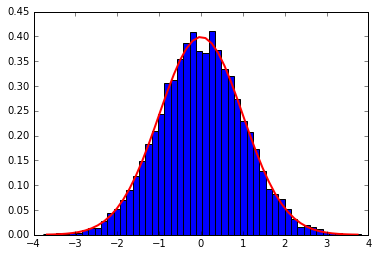

In [46]:
counts_normed, bins, patches = plt.hist(x, bins=n_bins,normed=True)
plt.plot(bin_centers,prediction_normed, c='r', lw=2)

In [51]:
# Note, they don't add up to 1., they add up to (roughly) 1/bin_width
np.sum(prediction_normed), np.sum(counts_normed)

(6.6014382152927498, 6.6024399206195126)

In [52]:
1/bin_width

6.6024399206195179

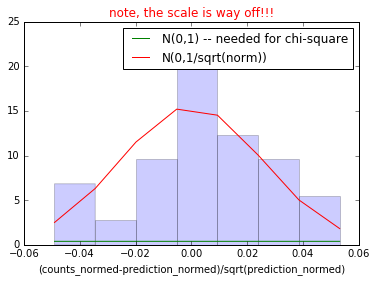

In [75]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts_normed-prediction_normed)/np.sqrt(prediction_normed), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1) -- needed for chi-square')
plt.plot(temp[1], norm.pdf(temp[1], 0,1./np.sqrt(normalization)), label='N(0,1/sqrt(norm))')
plt.legend()
plt.xlabel('(counts_normed-prediction_normed)/sqrt(prediction_normed)')
plt.title('note, the scale is way off!!!', color='r')

In [62]:
#wrong way
np.sum((counts_normed-prediction_normed)**2/prediction_normed)

0.030040350343106814

In [63]:
#wrong way
chisq_obs_wrong, pvalue_wrong = chisquare(counts_normed, prediction_normed)
chisq_obs_wrong, pvalue_wrong

(0.030040350343106814, 1.0)

In [76]:
## compare with the right way
chisq_obs, pvalue

(45.498862093830645, 0.61586732424588986)

In [64]:
#p-value
chi2.sf(chisq_obs_wrong,counts.size)

1.0

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5